## Import Libraries

In [1]:
# We import here libraries that we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



## Gather Data

In [2]:
df = pd.read_excel(r'./../data/creditcardmarketing.xlsx') # import the excel file using a relative path to the 'data' folder

## Explore and Clean Data

In [3]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
print("Number of rows: ", df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  18000
Number of columns:  17


> #### **Observations:**
> - column names need to be standardized
> - average balance column needs to be checked against the other quarter balances
> 

In [5]:
# Clean column names
cols = [col_name.lower().replace(' ', '_') for col_name in df.columns]
df.columns = cols
df.rename(columns={'#_bank_accounts_open': 'bank_accounts_open', '#_credit_cards_held' : 'credit_cards_held', '#_homes_owned' : 'homes_owned'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

> **Note:** dtypes seems to be in order. However, we can see that there are some missing values in the 5 balance columns

In [7]:
# How many null values is present in the data?
nulls = df.isna().sum()
nulls[nulls>0]

average_balance    24
q1_balance         24
q2_balance         24
q3_balance         24
q4_balance         24
dtype: int64

In [8]:
#Percentage of missing values
round(24/df.shape[0],3)

0.001

> **Note:** Since the missing values represent less than 1% of our data, we will opt to drop them. We will, however, keep them in a df for safekeeping.

In [9]:
# New dataframe to keep records with null values
df_nans = df[df.average_balance.isna()]
df_nans.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN


In [10]:
# Make a copy of the original, cleaned data before dropping the missing values
df_copy = df.copy()

In [11]:
# Drop missing values from the dataframe to be used moving forward since it represents less than 1% of all the records
df = df[~df.average_balance.isna()]
df.shape

(17976, 17)

### Target
 - Our target variable for this project is the offer_accepted column.
 - Below is a closer look at the distribution of the target variable:

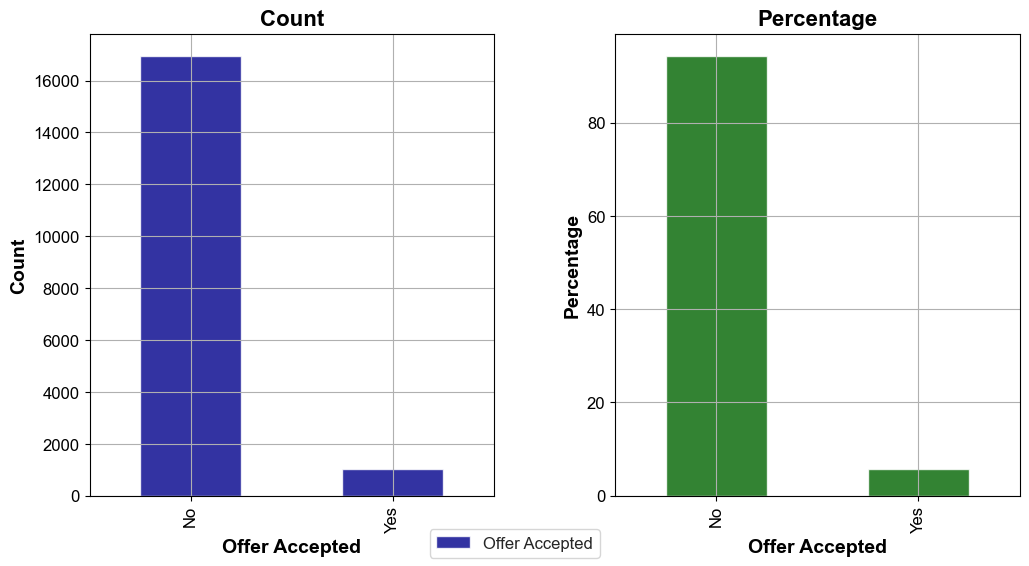

In [12]:
# Compute the count of each category
counts = df['offer_accepted'].value_counts()

# Compute the percentage of each category
percentages = df['offer_accepted'].value_counts(normalize=True) * 100

# Create a grid of two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Set the style using seaborn
sns.set_style("whitegrid")

# Plot the count of each category in the first subplot
counts.plot(kind='bar', ax=ax1, color='darkblue', alpha=0.8)
ax1.set_title('Count', fontsize=16, fontweight='bold')
ax1.set_xlabel('Offer Accepted', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=14, fontweight='bold')
ax1.tick_params(axis='both', labelsize=12)

# Plot the percentage of each category in the second subplot
percentages.plot(kind='bar', ax=ax2, color='darkgreen', alpha=0.8)
ax2.set_title('Percentage', fontsize=16, fontweight='bold')
ax2.set_xlabel('Offer Accepted', fontsize=14, fontweight='bold')
ax2.set_ylabel('Percentage', fontsize=14, fontweight='bold')
ax2.tick_params(axis='both', labelsize=12)

# Add a legend
fig.legend(labels=['Offer Accepted'], loc='lower center', ncol=1, fontsize=12)

# Add some space between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


In [13]:
target = df.offer_accepted
target = target.map({'No': 0, 'Yes':1})
target.value_counts()

offer_accepted
0    16955
1     1021
Name: count, dtype: int64

> **Note:** There is a huge imbalance present in the target variable which will definitely impact our models. To minimize this bias, this will be addressed later on.

### Numerical Variables

In [14]:
# Create separate df for numerical variables
numericals = df.select_dtypes(np.number)
numericals.drop('customer_number', axis=1, inplace=True)
numericals.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [15]:
numericals.describe().round(2)

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.00,17976.0,17976.00,17976.00,17976.00,17976.00,17976.00,17976.00,17976.00
mean,1.26,1.9,1.20,3.50,940.52,910.45,999.39,1042.03,810.19
std,0.47,0.8,0.43,1.11,350.30,620.08,457.40,553.45,559.00
min,1.00,1.0,1.00,1.00,48.25,0.00,0.00,0.00,0.00
25%,1.00,1.0,1.00,3.00,787.50,392.75,663.00,633.00,363.00
50%,1.00,2.0,1.00,3.00,1007.00,772.00,1032.00,945.50,703.00
75%,1.00,2.0,1.00,4.00,1153.25,1521.00,1342.00,1463.00,1212.00
max,3.00,4.0,3.00,9.00,3366.25,3450.00,3421.00,3823.00,4215.00


> **Note:** Looking at some statistics above, we can assume that balance will most likely be skewed. There also seem to be household size that reaches 9 so this column will be looked at in more detail.

In [16]:
numericals.household_size.value_counts()

household_size
3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: count, dtype: int64

In [17]:
numericals[(numericals.household_size == 8) | (numericals.household_size == 9)]

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
38,1,1,2,8,1285.0,206.0,1499.0,1545.0,1890.0
101,1,1,1,9,161.5,44.0,99.0,454.0,49.0


<Axes: >

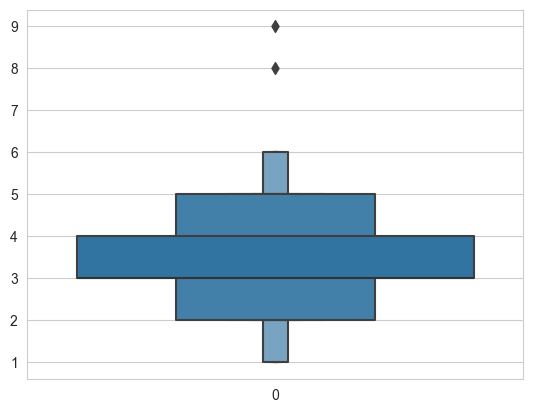

In [18]:
sns.boxenplot(numericals.household_size)

In [19]:
q1 = np.percentile(numericals.household_size,25)
q3 = np.percentile(numericals.household_size,75)
iqr = q3 - q1
upper_limit =  q3 + (1.5 * iqr)
upper_limit.round()

6.0

> **Note:** Seeing as there are only 1 data point each for household sizes 8 and 9, we will be capping both to 6 which is the upper limit.

In [20]:
numericals.household_size = numericals.household_size.apply(lambda x: 6 if x > 6 else x)
numericals.household_size.value_counts().sort_index()

household_size
1     539
2    2809
3    5705
4    5532
5    2851
6     540
Name: count, dtype: int64

In [21]:
# check if average_balance is corresponds to the average of the 4 quarters balance
balance_check = numericals.iloc[:, -4:]
balance_check['avg'] = balance_check.mean(axis=1)
(balance_check.avg == numericals.average_balance).value_counts()

True    17976
Name: count, dtype: int64

> **Note:** The average_balance column IS the average of all 4 quarters balance. Multicollinearity will be checked below.

### Separate Contiuous from Discrete Numerical Variables

In [22]:
# separate df with continuous numerical variables
cont = numericals.iloc[:, -5:]
cont.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/704146453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[column])


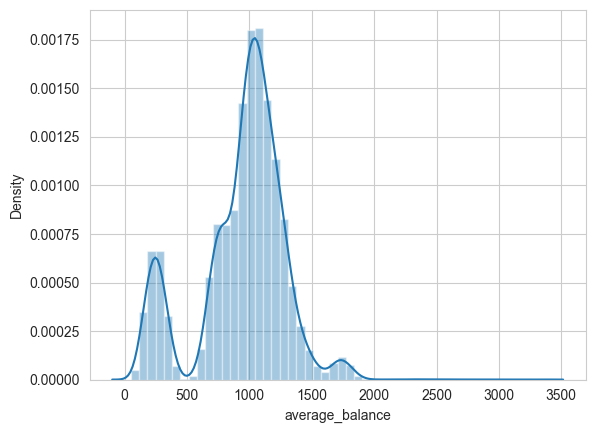

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/704146453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[column])


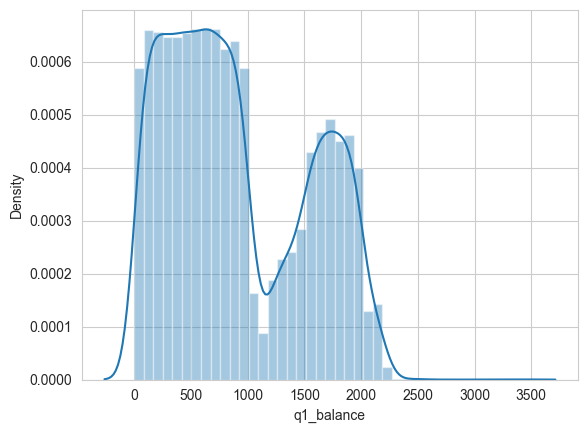

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/704146453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[column])


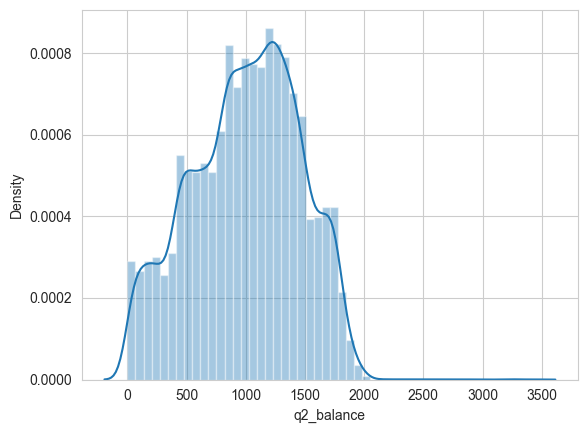

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/704146453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[column])


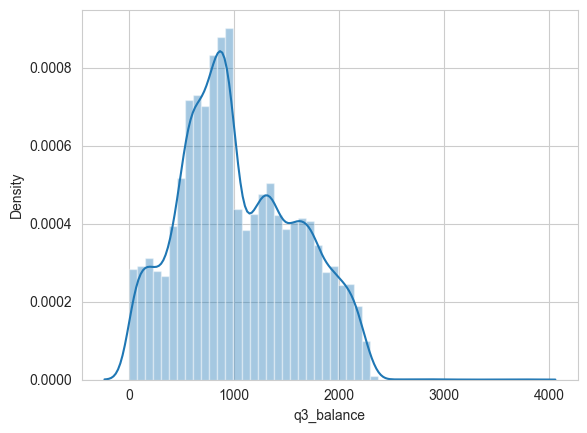

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/704146453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[column])


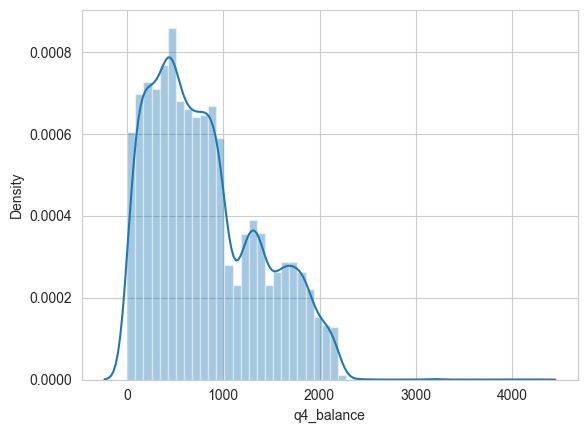

In [23]:
for column in cont: 
    sns.distplot(cont[column])
    plt.show()  

> **Observations:**
>   - average_balance : looks like two normal distributions, one smaller than the other.
>   - q2_balance looks to be closest to the normal distribution.

#### Looking at the Outliers

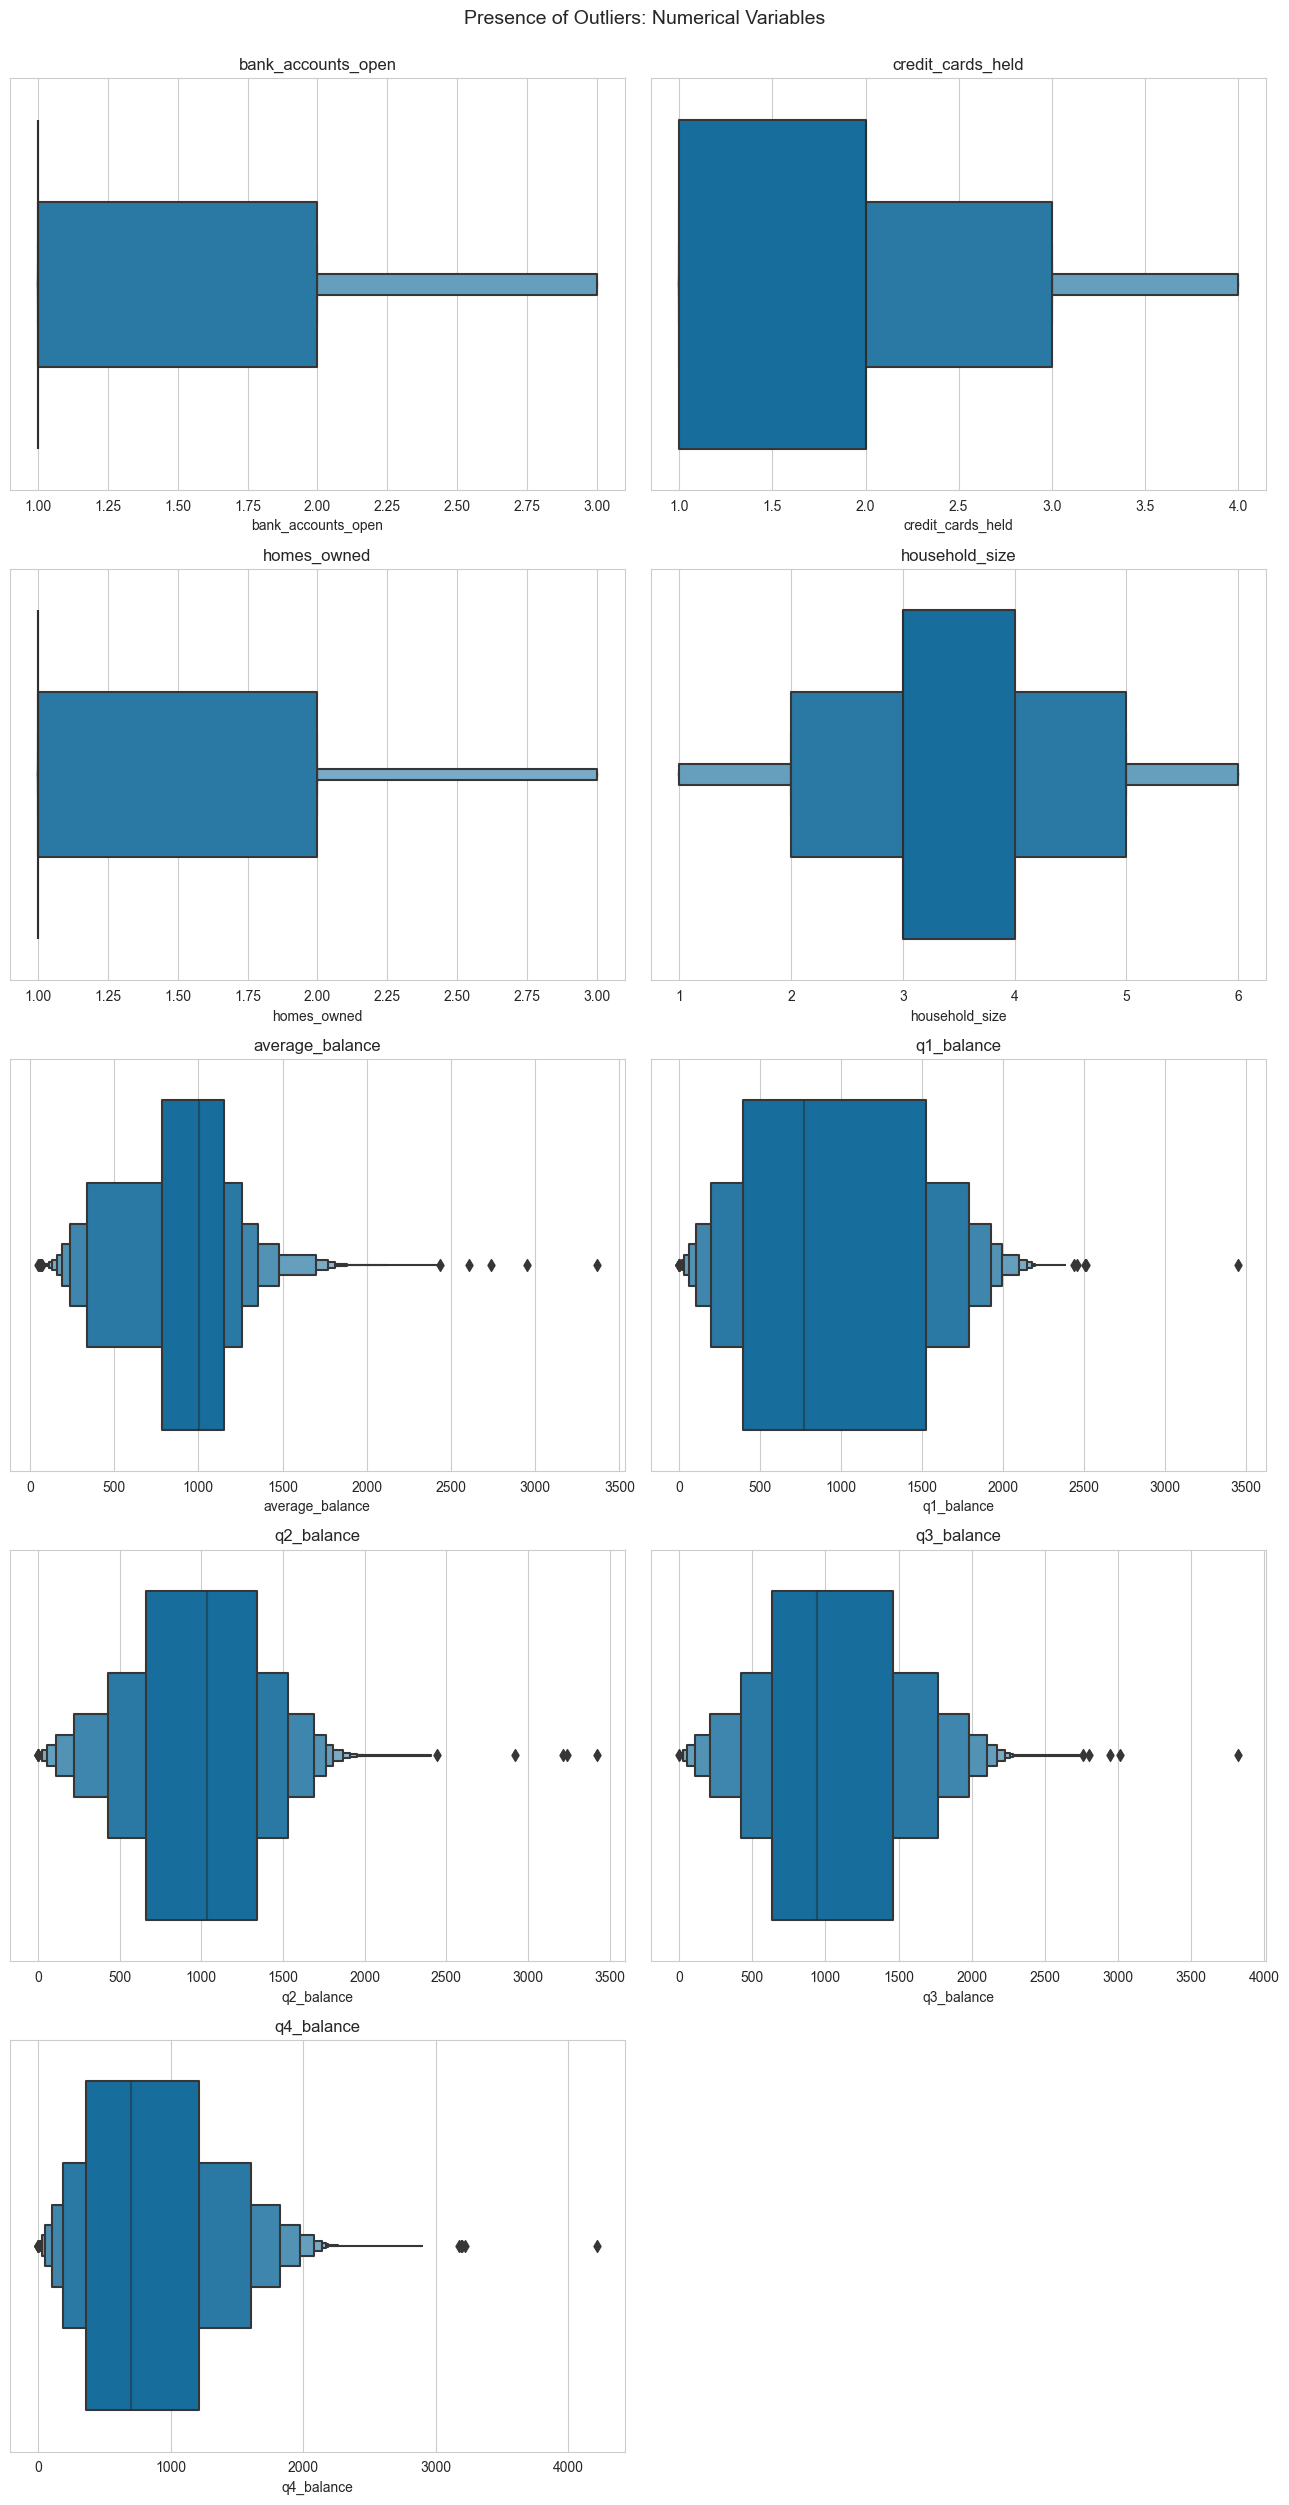

In [24]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,25))
plt.suptitle("Presence of Outliers: Numerical Variables", fontsize = 14, y=1)
sns.set_palette('colorblind')

for i in numericals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxenplot(x = numericals[i])
    c = c + 1

plt.tight_layout()
plt.show()

> **Note:** Before dealing with outliers, we will first transform continuous variables.

In [25]:
# Pearson Correlation for continuous variables
corr_matrix = cont.join(target).corr()

In [26]:
corr_matrix.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer_accepted
average_balance,1.000000,0.481507,0.800285,0.752741,0.572380,-0.003878
q1_balance,0.481507,1.000000,0.483134,-0.060961,-0.237283,-0.016535
q2_balance,0.800285,0.483134,1.000000,0.487710,0.168955,-0.000310
q3_balance,0.752741,-0.060961,0.487710,1.000000,0.565298,0.008378
q4_balance,0.572380,-0.237283,0.168955,0.565298,1.000000,0.000580


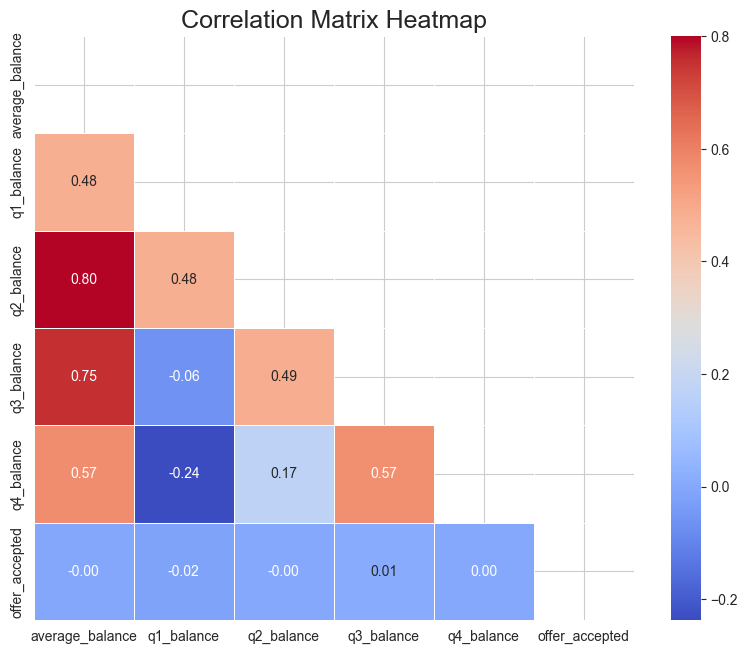

In [27]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Add a title and adjust the margins
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.subplots_adjust(left=0.15, bottom=0.15)

# Show the plot
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.round(2)

In [29]:
calc_vif(numericals)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bank_accounts_open,6.62
1,credit_cards_held,5.69
2,homes_owned,7.19
3,household_size,8.12
4,average_balance,inf
5,q1_balance,inf
6,q2_balance,inf
7,q3_balance,inf
8,q4_balance,inf


> **Note:** After checking for the variance inflation factor (VIF) we can see that the average balance and the 4 quarter balances are perfectly correlated with each other. We will still keep all the variables, though, as this would not be a problem for certain models which would be applied later.

In [30]:
# Discrete Numerical Variables
discrete = numericals.iloc[:, :4].join(target)
discrete

,bank_accounts_open,credit_cards_held,homes_owned,household_size,offer_accepted
0,1,2,1,4,0
1,1,2,2,5,0
2,2,2,1,2,0
3,2,1,1,4,0
4,1,2,1,6,0
...,...,...,...,...,...
17995,1,1,1,5,0
17996,1,3,1,3,0
17997,1,2,1,4,0
17998,1,4,2,2,0


#### Distribution of Discrete Numerical Variables

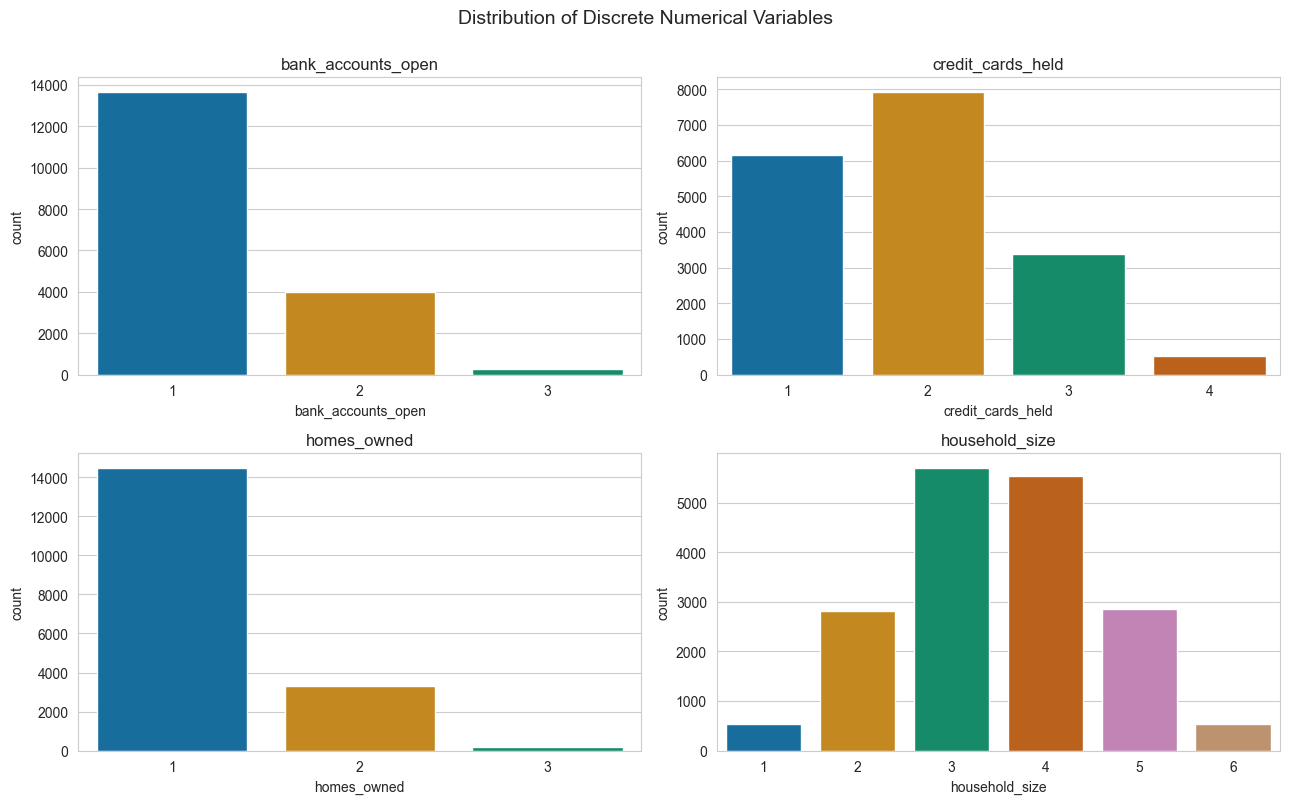

In [31]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,8))
plt.suptitle("Distribution of Discrete Numerical Variables", fontsize = 14, y=1)
sns.set_palette('colorblind')

for i in discrete.drop('offer_accepted', axis=1):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = discrete, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

#### Distribution in Relation With Target

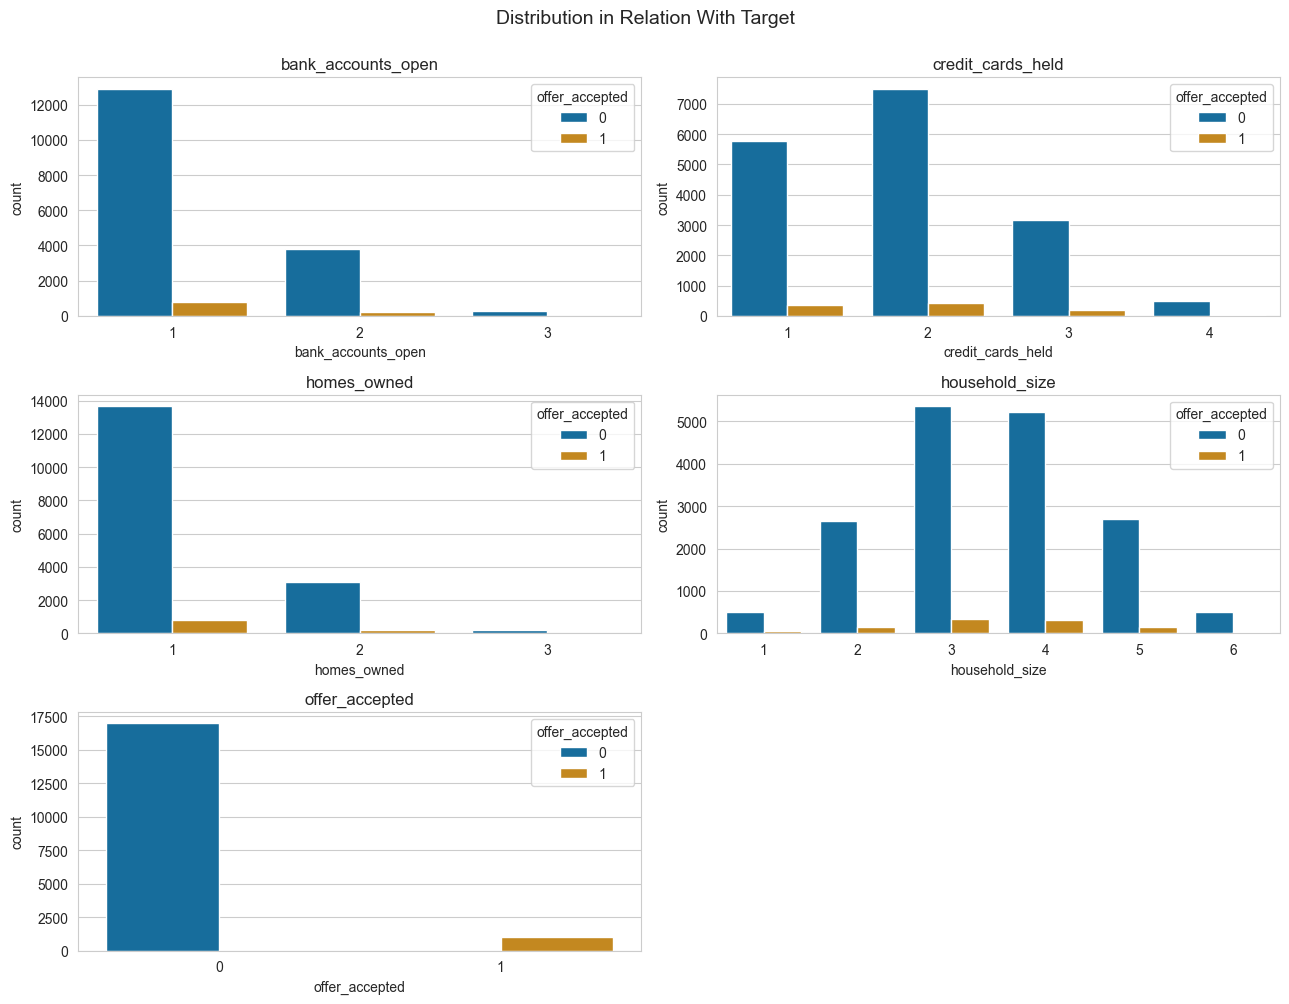

In [32]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,10))
plt.suptitle("Distribution in Relation With Target", fontsize = 14, y=1)
sns.set_palette('colorblind')

for i in discrete:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = discrete, x = i, hue=('offer_accepted'))
    c = c + 1

plt.tight_layout()
plt.show()

In [33]:
# Kendall Correlation
corr_discrete = discrete.corr(method='kendall').round(2)
corr_discrete

,bank_accounts_open,credit_cards_held,homes_owned,household_size,offer_accepted
bank_accounts_open,1.00,-0.0,0.01,0.01,0.00
credit_cards_held,-0.00,1.0,0.00,-0.00,-0.00
homes_owned,0.01,0.0,1.00,0.00,0.00
household_size,0.01,-0.0,0.00,1.00,-0.01
offer_accepted,0.00,-0.0,0.00,-0.01,1.00


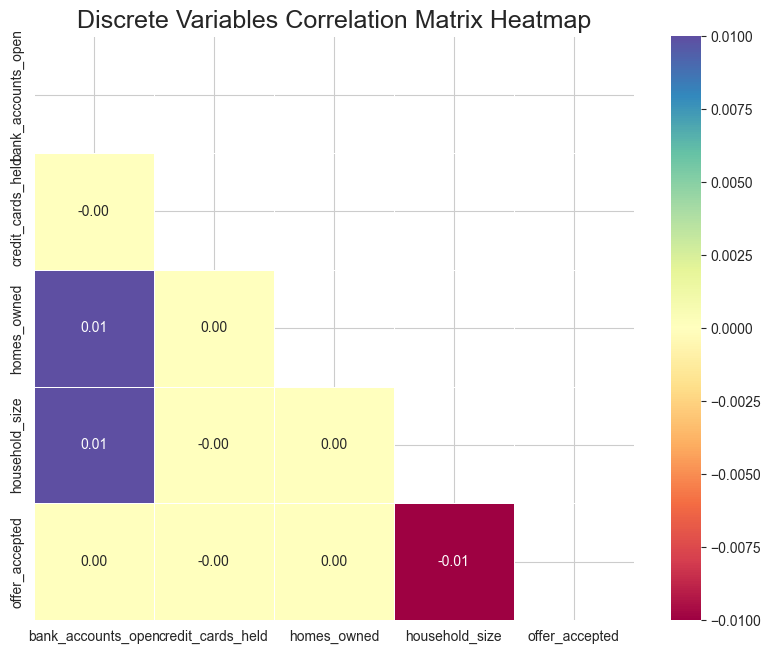

In [34]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_discrete, dtype=bool))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap using the mask
sns.heatmap(corr_discrete, mask=mask, cmap='Spectral', annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Add a title and adjust the margins
plt.title('Discrete Variables Correlation Matrix Heatmap', fontsize=18)
plt.subplots_adjust(left=0.15, bottom=0.15)

# Show the plot
plt.show()

> **Note:** There doesn't seem to be any correlation between the target and the other independent variables.

### Transformations

In [35]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN 
    
def sqrt_transform(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

In [44]:
from scipy.stats import boxcox, yeojohnson

In [45]:
def boxcox_transform(col):
    from scipy.stats import boxcox, yeojohnson
    if all(col >= 0):
        # Apply Box-Cox transform for positive values
        transformed_data, lambda_ = boxcox(col)
        return transformed_data, lambda_
    else:
        # Apply Yeo-Johnson transform for negative values
        transformed_data, lambda_ = yeojohnson(col)
        return transformed_data, lambda_

In [37]:
def plot_transformations(col):
    orig = col
    bc, lmbda = boxcox_transform(col)
    log = list(map(log_transform, col))
    sqrt = list(map(sqrt_transform, col))
    
    fig = plt.figure(figsize = (15,8))
    plt.suptitle("Data for columns: {}".format(col.name),fontsize = 14, y=1)
    
    plt.subplot(221)
    fig1 = sns.distplot(orig)
    fig1.axvline(x = orig.mean(), color="red")
    fig1.axvline(x = np.median(orig), color="green")
    plt.title('Original')
    
    plt.subplot(222)
    fig2 = sns.distplot(bc)
    fig2.axvline(x = bc.mean(), color="red")
    fig2.axvline(x = np.median(bc), color="green")
    plt.title('Box-Cox')
    
    plt.subplot(223)
    fig3 = sns.distplot(log)
    fig3.axvline(x = np.mean(log), color="red")
    fig3.axvline(x = np.median(log), color="green")
    plt.title('Log Transformed')
    
    plt.subplot(224)
    fig4 = sns.distplot(sqrt)
    fig4.axvline(x = np.mean(sqrt), color="red")
    fig4.axvline(x = np.median(sqrt), color="green")
    plt.title('Square Root')
    
    plt.tight_layout()
    plt.show()

Index(['average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/405630920.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig1 = sns.distplot(orig)
/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/405630920.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sns.distplot(bc)
/var/folders/8z/

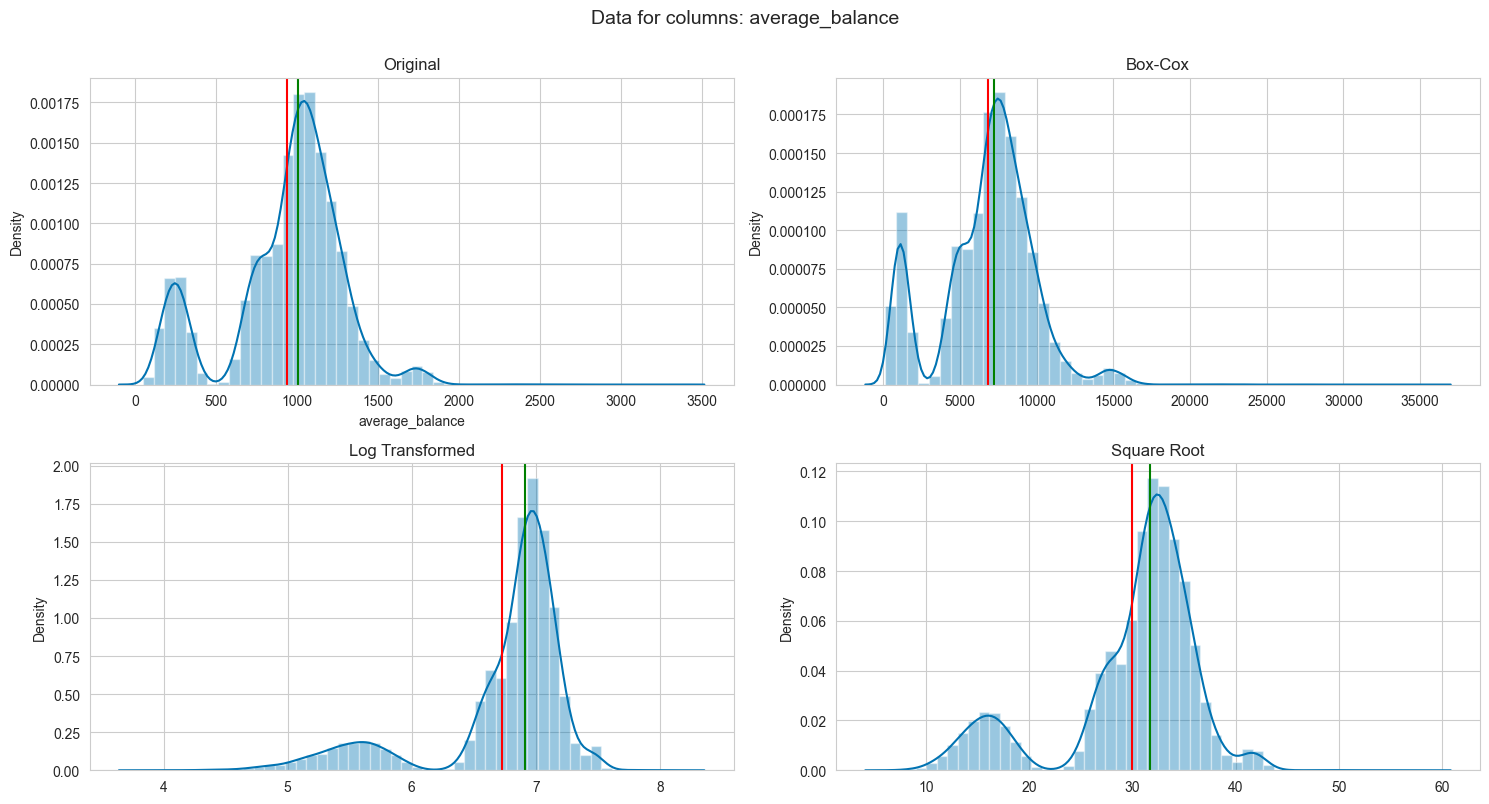

In [46]:
plot_transformations(cont.average_balance)

In [48]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

def power_transform(data, method='box-cox'):
    """
    Apply Box-Cox or Yeo-Johnson transformation on the input data

    Parameters:
    data (numpy array): input data to be transformed
    method (str): 'box-cox' or 'yeo-johnson' (default 'box-cox')

    Returns:
    numpy array: transformed data
    """
    if method == 'box-cox':
        if np.any(data <= 0):
            raise ValueError("Data must be positive for Box-Cox transformation")
        transformer = PowerTransformer(method='box-cox', standardize=False)
    elif method == 'yeo-johnson':
        transformer = PowerTransformer(method='yeo-johnson', standardize=False)
    else:
        raise ValueError("Invalid method selected. Choose 'box-cox' or 'yeo-johnson'")

    return transformer.fit_transform(data.reshape(-1, 1)).ravel()


In [52]:
def boxcox(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].median())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [54]:
boxcox(cont)

(       average_balance  q1_balance   q2_balance  q3_balance  q4_balance
 0          8703.958501   73.806714   639.907737  173.963004   50.510258
 1           563.218895   10.155405    85.877542   27.327727   30.915140
 2          1299.266926   34.267022   269.339474   42.536782   25.160969
 3          9287.622984   71.766493  1237.303467  176.584215   33.047549
 4          9206.914353   83.553465   967.385926  161.367403   30.873360
 ...                ...         ...          ...         ...         ...
 17995       668.250437   20.359429    53.692811   25.534194   32.221049
 17996      5763.396657   56.619201   683.357344  156.915400   37.255846
 17997      7981.026326   54.671439   563.625790  182.096117   61.184418
 17998      7354.790374   45.035903   712.921651  147.832335   63.504817
 17999      7678.383978   28.947938   981.549493  261.426106   39.495946
 
 [17976 rows x 5 columns],
 {'average_balance': [1.3254353511426422],
  'q1_balance': [0.48623800798678357],
  'q2_balance

In [ ]:
power_transform(cont.q1_balance, 'box-cox')

In [50]:
power_transform(cont.q1_balance, 'yeo-johnson')

AttributeError: 'Series' object has no attribute 'reshape'

In [47]:
plot_transformations(cont.q1_balance)

ValueError: Data must be positive.

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/405630920.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig1 = sns.distplot(orig)
/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_22132/405630920.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sns.distplot(bc)
/var/folders/8z/

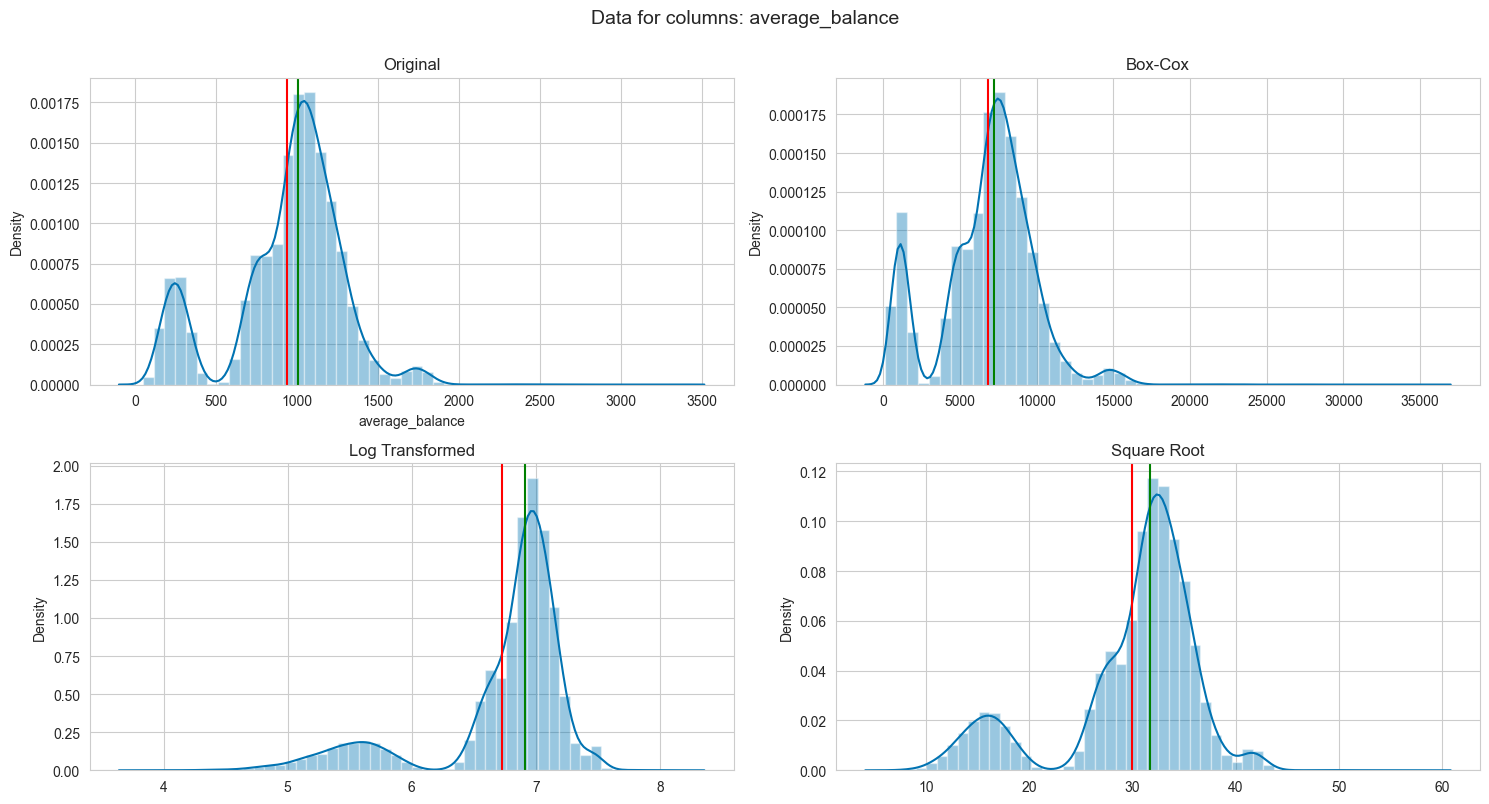

ValueError: Data must be positive.

In [38]:
for col in cont.columns:
    plot_transformations(cont[col])

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data
scaled_numericals = scaler.fit_transform(cont)

# create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_numericals, columns=cont.columns)
# plot the histograms
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, col in enumerate(scaled_df.columns):
    axs[i].hist(scaled_df[col], bins=8)
    axs[i].set_title('Histogram of {} (scaled)'.format(col))
    
plt.tight_layout()
plt.show()

### Categorical Variables

In [ ]:
cat_df = df.select_dtypes(include=['object'])

In [ ]:
cat_df.head()

In [ ]:
# separate target variable
y = cat_df.offer_accepted
y.value_counts()

In [ ]:
cat_df.drop('offer_accepted', axis=1, inplace=True)

In [ ]:
#separate ordinal from nominal categoricals
nominal = cat_df[['reward', 'mailer_type', 'overdraft_protection', 'own_your_home']]
nominal.head()

In [ ]:
# Use pandas get_dummies to create binary indicators for each category
encoded_df = pd.get_dummies(nominal).astype(int)
encoded_df

In [ ]:
#ordinal variables
ordinal = cat_df[['income_level', 'credit_rating']]
ordinal.head()


In [ ]:
order = {'Low' : 0, 'Medium': 1, 'High' : 2}
ordinal.income_level = ordinal.income_level.map(order)
ordinal.credit_rating = ordinal.credit_rating.map(order)

In [ ]:
ordinal.nunique()

In [ ]:
categoricals = pd.concat([ordinal, encoded_df], axis=1)
categoricals.head()

In [ ]:
# Use pandas get_dummies to create binary indicators for each category
encoded_df.head()

# Concatenate the encoded dataframe with the original dataframe
new_df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
new_df = new_df.drop(columns=cat_df.columns)

# Print the first 5 rows of the new dataframe
print(new_df.head())

In [ ]:
df.info()

In [ ]:
X = numericals.join(categoricals)
X.drop('customer_number', axis=1, inplace=True)

In [ ]:
X.head()

In [ ]:
X.to_csv('/Users/hugopabst/Documents/GitHub/hrc-mid-bootcamp-project/data/X.csv')
y.to_csv('/Users/hugopabst/Documents/GitHub/hrc-mid-bootcamp-project/data/y.csv')

In [ ]:
y.info()

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
